The competitive Lotka-Volterra model is given as:

$\dot{x} = r_x x(1 - \frac{x+a_{xy}y}{K_y})$ 

$\dot{y} = r_y y(1 - \frac{y+a_{yx}x}{K_y})$

The parameters are:

$r_x = 3, r_y = 2, K_x = 3, K_y = 2, a_{xy} = 2, a_{yx} = 1$

In order to get the nullclines more easily, we first multiply out both equations. We get:

$\dot{x} = r_x x(1 - (\frac{x}{K_y}+\frac{a_{xy} y}{K_y}))$ 

$\equiv \dot{x} = r_x x - \frac{r_x}{K_x} x^2 - \frac{r_x a_{xy}}{K_x} xy$

and 

$\dot{y} = r_y y(1 - (\frac{y}{K_y} + \frac{a_{yx}x}{K_y}))$

$\equiv \dot{y} = r_y y - \frac{r_y}{K_y} y^2 - \frac{r_y a_{yx}}{K_y} xy$

If we then instantiate the equations with the given parameters we get the following equations

$\dot{x} = 3x - x^2 - 2xy$

$\equiv \dot{x} = x(3-x-2y)$

and 

$\dot{y} = 2y -y^2 - xy$

$\equiv \dot{y} = y(2 - y - x)$

In order to get the nullclines we set $\dot{x}$ and $\dot{y}$ to be 0. There are two solutions for each equation respectively.

For the first equation

1. $x = 0$
2. $3-x-2y=0 \equiv y = \frac{3}{2} - \frac{x}{2}$

and the second

1. $y = 0$
2. $2-y-x=0 \equiv y = 2-x$

The fixpoints of the system are the points where the nullclines cross each other. Analytically we can calculate the fixpoints by solving the linear system of equations for each combination of one equation for $\dot{x}$ with one equation for $\dot{y}$

We get three trivial fixpoints:
(0,0)
(0,2)
(3,0)

And for the last one we solve the linear equation system:

$3-x-2y=0$

$2-y-x=0$

to be the last fixpoint at (1,1)

In order to analyse the stability of the fix points we first need to construct the general jacobian matrix for $\dot{x}$ and 
$\dot{y}$

$J = \begin{bmatrix}
3-2x-2y & -2x \\
-y & 2-2y-x 
\end{bmatrix}  $

For (0,0)

$ J_{(0,0)}\begin{bmatrix}
3 & 0 \\
0 & 2 
\end{bmatrix}  $

$p = 5 \\
q = 6 \\
\Delta = 5^2 - 4*6 = 1$

Thus (0,0) is an unstable node

For (0,2)

$ J_{(0,2)}\begin{bmatrix}
-1 & 0 \\
-2 & -2 
\end{bmatrix}  $

$p = -3 \\
q = 2 \\
\Delta = -3^2 - 4*2 = 1$

Thus (0,2) is a stable node

For (3,0)

$ J_{(3,0)}\begin{bmatrix}
-3 & -6 \\
0 & -1 
\end{bmatrix}  $

$p = -4 \\
q = 3 \\
\Delta = -4^2 - 4*3 = 4$

Thus (3,0) is a stable node

For (1,1)

$ J_{(1,1)}\begin{bmatrix}
-1 & -2 \\
-1 & -1 
\end{bmatrix}  $

$p = -2 \\
q = -1 \\
\Delta = -2^2 - 4*-1 = 8$

Thus (1,1) is a saddle point


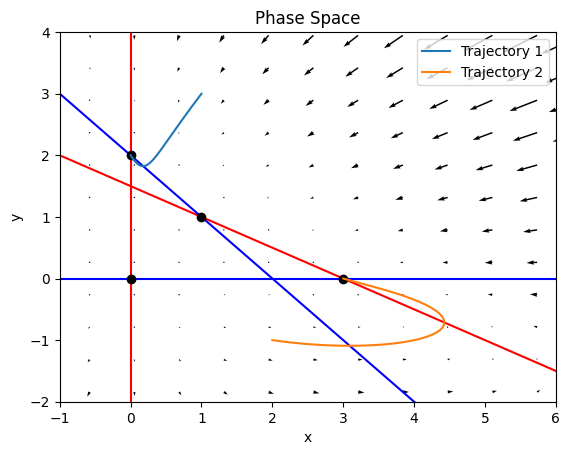

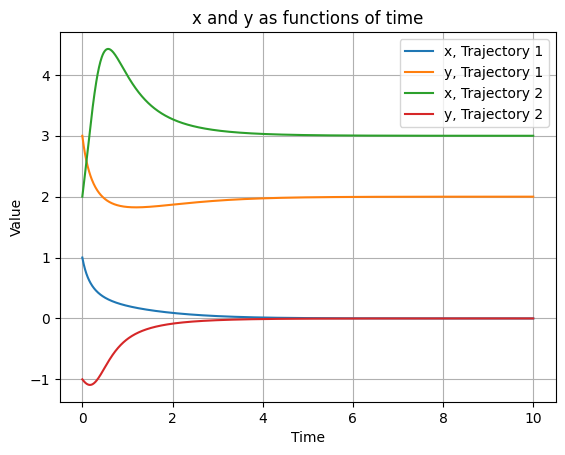

In [42]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import odeint

def n1(x):
    return -x/2 + 3/2

def n2(x): 
    return 2-x

x = np.linspace(-2,6,1000)

plt.plot(x, n1(x), color='red')
plt.axvline(x = 0, color='red')
plt.plot(x, n2(x), color='blue')
plt.axhline(y = 0, color='blue')

plt.plot(0,0, marker='o', color='black')
plt.plot(0,2, marker='o', color='black')
plt.plot(3,0, marker='o', color='black')
plt.plot(1,1, marker='o', color='black')

plt.xlim(-1,6)
plt.ylim(-2,4)

def vector_field(x, y):
    dx = 3*x - x**2 - 2*x*y
    dy = 2*y - y**2 - x*y
    return dx, dy

x_range = np.linspace(-5, 7, 20)
y_range = np.linspace(-5, 5, 20)

X, Y = np.meshgrid(x_range, y_range)

U, V = vector_field(X, Y)

plt.quiver(X, Y, U, V)

def vector_field_trajectory(variables, t):
    x, y = variables
    dx = 3*x - x**2 - 2*x*y
    dy = 2*y - y**2 - x*y
    return [dx, dy]

# Starting values for the two trajectories
initial_conditions = [[1, 3], [2, -1]]

# Time points for the simulation
t = np.linspace(0, 10, 1000)

# Simulate the trajectories
trajectories = [odeint(vector_field_trajectory, initial_condition, t) for initial_condition in initial_conditions]

# Extract x and y coordinates for each trajectory
x_traj = [trajectory[:, 0] for trajectory in trajectories]
y_traj = [trajectory[:, 1] for trajectory in trajectories]

# Plotting phase space
plt.plot(x_traj[0], y_traj[0], label='Trajectory 1')
plt.plot(x_traj[1], y_traj[1], label='Trajectory 2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Space')
plt.legend()

plt.show()

plt.plot(t, x_traj[0], label='x, Trajectory 1')
plt.plot(t, y_traj[0], label='y, Trajectory 1')
plt.plot(t, x_traj[1], label='x, Trajectory 2')
plt.plot(t, y_traj[1], label='y, Trajectory 2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('x and y as functions of time')
plt.legend()
plt.grid(True)
plt.show()

Exercise 2

Rabbits: $\dot{x} = \alpha x - \beta xy$

Foxes: $\dot{y} = \delta xy - \gamma y$

Parameters:
$\alpha=0.1, \beta=0.02, \gamma=0.4, \delta=0.02$

To get the nullclines we rewite both functions:

$\dot{x} = x * (\alpha - \beta y)$

$\dot{y} = y * (\delta x - \gamma) $

Then we instantiate the equations with the given parameters we get the following equations:

$\dot{x} = x * (0.1 - 0.02 * y) $

$\dot{y} = y * (0.02 * x - 0.4) $

In order to get the nullclines we will set the function to zero. We can easily see that the brackets can get zero or the multiplicator  

for $\dot{x}$ there will be following nullclines: 
$ x = 0$ $y = \frac {\alpha}{\beta} = \frac {0.1}{0.02} = 5$

for $\dot{y}$ there will be following nullclines:
$ y = 0$ $x = \frac {\gamma}{\delta} = \frac{0.4}{0.02} = 20 $

the fixpoint of the system are the points where the nullclnes cross each other. Analytically we can calculate the fixpoints by solving the linear system if equations for each combination of one equations for $\dot{x}$ with one equations for $\dot{y}$

in this case we get two trivial fixpoints: (0,0) (20, 5)

to create the jacobian matrix, we need to derivation:

$\frac{df}{dx} = \alpha - \beta y $  

$\frac{df}{dy} = -\beta x$

$\frac{dg}{dx} = \delta y $  
   
$\frac{dg}{dy} = \delta x - \gamma $

this results in following matrix:

$J = \begin{bmatrix}
\alpha - \beta y & -\beta x \\
\delta y & \delta x - \gamma 
\end{bmatrix}  $

Now we set the fixpoints in the matrix an get following matrix:

$J_(0,0) = \begin{bmatrix}
\alpha  & 0\\
0 &  - \gamma 
\end{bmatrix}  $

$\lambda _1  = \alpha $ $\lambda _2 = -\gamma $

$\tau = \alpha - \gamma = 0.1 - 0.4 = - 0.7$
$\Delta = -\alpha* \gamma = - 0.1*0.4 = - 0.04$

we can already see that all parameters are bigger then zero meaning that alpha and gamma are bigger then zero. So it's an settle. 

for the other fixpoint there is following matrix:

$J_(20,5) = \begin{bmatrix}
0 & -0.4\\
0.1 & 0 
\end{bmatrix}  $

$\tau = 0$
$\Delta = 0.04

it's a center point. In this point it's stable. if we are a bit off points it will draw cyrcles around this points 

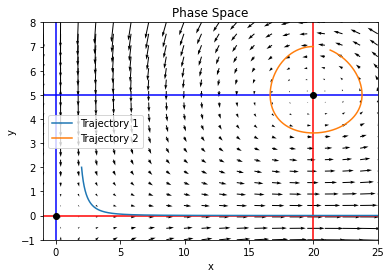

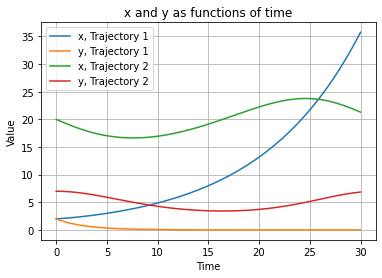

In [27]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.integrate import odeint

#nullclines for rabbits
plt.axvline(x = 0, color='blue')
plt.axhline(y = 5, color='blue')
#nullclines for foxes
plt.axvline(x = 20, color='red')
plt.axhline(y = 0, color='red')

plt.plot(0,0, marker='o', color='black')
plt.plot(20,5, marker='o', color='black')

plt.xlim(-1,25)
plt.ylim(-1,8)

def vector_field(x, y):
    dx = x*(0.1 - 0.02 * y)
    dy = y*(0.02 * x - 0.4)
    return dx, dy

x_range = np.linspace(-1, 25, 20)
y_range = np.linspace(-1, 8, 20)

X, Y = np.meshgrid(x_range, y_range)

U, V = vector_field(X, Y)

plt.quiver(X, Y, U, V)

def vector_field_trajectory(variables, t):
    x, y = variables
    dx = x*(0.1 - 0.02 * y)
    dy = y*(0.02 * x - 0.4)
    return [dx, dy]

# Starting values for the two trajectories
initial_conditions = [[2, 2], [20, 7]]

# Time points for the simulation
t = np.linspace(0, 30, 5000)

# Simulate the trajectories
trajectories = [odeint(vector_field_trajectory, initial_condition, t) for initial_condition in initial_conditions]

# Extract x and y coordinates for each trajectory
x_traj = [trajectory[:, 0] for trajectory in trajectories]
y_traj = [trajectory[:, 1] for trajectory in trajectories]

# Plotting phase space
plt.plot(x_traj[0], y_traj[0], label='Trajectory 1')
plt.plot(x_traj[1], y_traj[1], label='Trajectory 2')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Space')
plt.legend()

plt.show()

plt.plot(t, x_traj[0], label='x, Trajectory 1')
plt.plot(t, y_traj[0], label='y, Trajectory 1')
plt.plot(t, x_traj[1], label='x, Trajectory 2')
plt.plot(t, y_traj[1], label='y, Trajectory 2')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('x and y as functions of time')
plt.legend()
plt.grid(True)
plt.show()